In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
poke = pd.read_csv('Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
poke['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

--- 0.023897886276245117 seconds ---


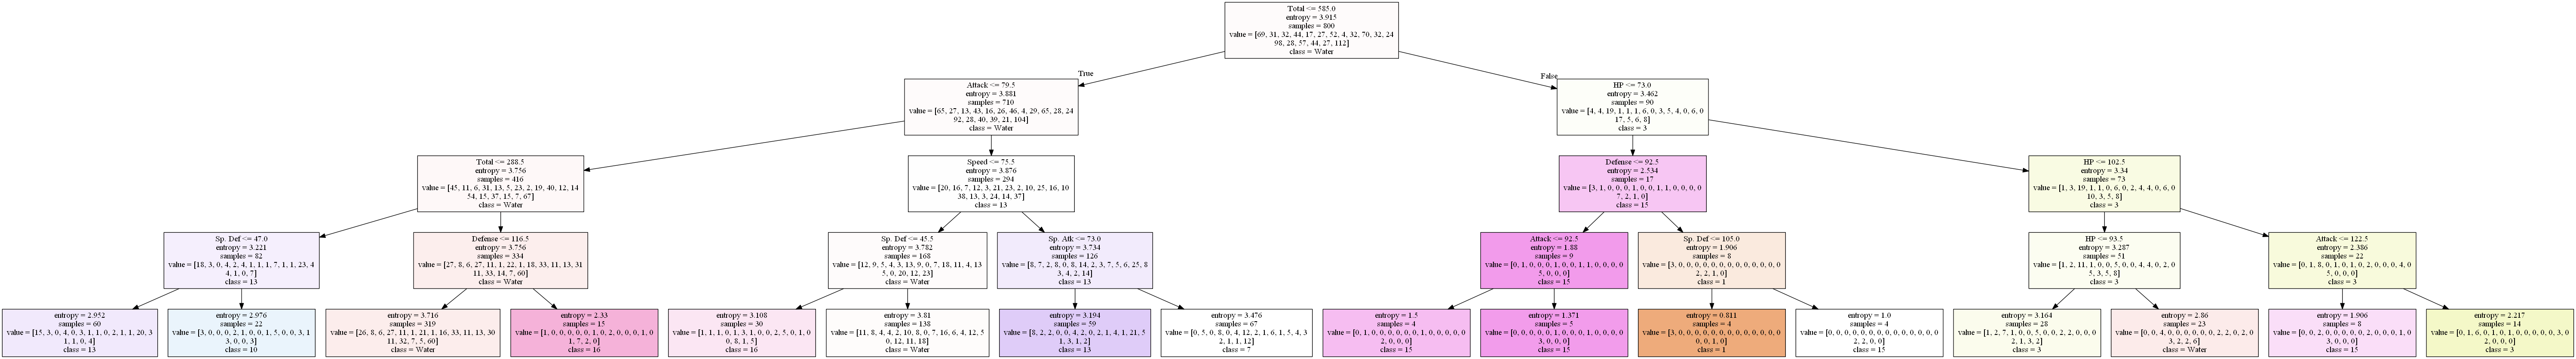

In [9]:
from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz
import time

X = poke[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
Y = poke['Type 1']

start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
decision_tree.fit(X, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', 'Water'],
    filled=True
)
print("--- %s seconds ---" % (time.time() - start_time))
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\micsa\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\micsa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.21348315 0.21590909 0.20481928 0.19277108 0.21518987 0.18987342
 0.30379747 0.10666667 0.23287671 0.16666667]
--- 0.22848010063171387 seconds ---


Feature ranking:
1. feature 6 (0.150302)
2. feature 4 (0.150288)
3. feature 1 (0.148715)
4. feature 0 (0.145485)
5. feature 5 (0.135590)
6. feature 3 (0.134903)
7. feature 2 (0.134717)


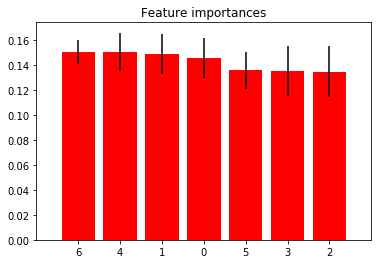

In [17]:
rfc.fit(X, Y)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()